# Data Toolkit Questions & Answers

### 1. What is NumPy, and why is it widely used in Python?

> What is Numpy?

- NumPy i.e. Numerical Python is a fundamental data toolkit library for scientific computing in Python. It provides support for:

  1. Multi-dimensional Arrays

     - core of NumPy is the ndarray object, which allows fast and memory-efficient array operations

     - NumPy arrays are stored in contiguous blocks of memory.

  2. Mathematical Functions

     - NumPy includes a comprehensive set of mathematical functions like sum, mean, std, sin, exp, etc. that operate efficiently on entire arrays.

  3. Linear Algebra and Random Numbers

     - Built-in support for matrix operations, eigenvalues, Fourier transforms, and random number generation.

  4. Interoperability
     
     - NumPy arrays can interface with other Python libraries like Pandas, SciPy, TensorFlow, and scikit-learn.

  5. Broadcasting and Vectorization

     - Avoids explicit loops by applying operations to arrays of different shapes, making code more concise and faster.

> Why is it widely used in Python?

  1. Performance - Significantly faster than native Python for numerical tasks.

  2. Ease of Use - Clean syntax and powerful functionality.

  3. Foundation - Serves as the base for most Python data science and machine learning tools.


> Compare pure python computation vs Numpy

 1. Pure Function example -
    import time
    
    size = 1_000_000      
    a = list(range(size))
    b = list(range(size))

    start = time.time()
    c = [a[i] + b[i] for i in range(size)]
    end = time.time()

    print(f"Python list addition took: {end - start:.4f} seconds")

 2. Using Numpy

    import numpy as np
    import time

    a = np.arange(1_000_000) #Create two large NumPy arrays
    b = np.arange(1_000_000)

    start = time.time()
    c = a + b   # Add element-wise using NumPy
    end = time.time()

    print(f"NumPy array addition took: {end - start:.4f} seconds")

Output -
Python list addition took: 0.12 seconds
NumPy array addition took: 0.01 seconds

- NumPy is ~10x faster due to optimized C-backend and vectorized operations.
- Code is more concise (c = a + b instead of a loop).
- NumPy handles large-scale numerical operations more efficiently.


---

### 2. How does broadcasting work in NumPy?

- Broadcasting in NumPy is a powerful feature that allows arithmetic operations on arrays of different shapes and sizes without explicit looping or reshaping.

- NumPy automatically "stretches" or "broadcasts" smaller arrays so they match the shape of larger arrays when performing element-wise operations.

- If arrays have different ranks (number of dimensions), the shape of the smaller array is padded with ones on the left.

- NumPy compares the shapes element-wise from the end:
  - If dimensions match or one of them is 1 → it's compatible.
  - If they don't match → broadcasting fails.

- It avoids loops and keeps code concise.

- ex-

  1. Scalar and Array

    import numpy as np

    a = np.array([1, 2, 3])
    b = 2

    print(a + b) #op- [3 4 5]

  2. 2D and 1D Array

    a = np.array([[1, 2, 3],[4, 5, 6]])
    b = np.array([10, 20, 30])

    print(a + b) #op - [[11 22 33][14 25 36]]


  3. Incompatible Shapes

    a = np.array([[1, 2, 3]])
    b = np.array([[1],
                  [2]])

    print(a + b) # This works because (1,3) and (2,1) broadcast to (2,3)
    #op- [[2 3 4][3 4 5]]

  4. not work and raise exception

    a = np.array([1, 2, 3])
    b = np.array([[1], [2]])
    print(a + b)  # raise exception



---

### 3. What is a Pandas DataFrame?

- Pandas DataFrame is a 2-dimensional, tabular data structure in Python that is part of the Pandas library.

- It's similar to a spreadsheet, SQL table, or Excel sheet, with labeled rows and columns, and it's one of the most widely used tools for data manipulation and analysis.

- It has Dataframe and series

- Series we called for 1 column and DataFrame we called for more than 1 columns or more than 1 series.

  1. Rows and Columns - Organized in a tabular form with labeled axes (index for rows, columns for columns).

  2. Heterogeneous Data - Each column can hold a different data type ex-  int, float, string/object.

  3. Powerful Indexing - Supports both integer and label-based indexing via .loc[], .iloc[], etc.

  4. Data Cleaning & Analysis - Built-in functions for filtering, aggregation, joining, reshaping, and summarizing data.

  5. Integration - Works seamlessly with NumPy, Matplotlib, Seaborn, SQL databases, Excel, and more.

- Used for reading CSV/Excel files like pd.read_csv(), pd.read_excel() etc.

- Filtering data: df[df['Age'] > 30]

- Statistical summaries: df.describe()

- Handling missing data: df.dropna(), df.fillna()

- Grouping and aggregating: df.groupby('column').mean()

- ex-

    import pandas as pd

    data = {
        'Name': ['Khushboo', 'Arvind', 'Akira'],
        'Age': [25, 30, 2],
        'Salary': [70000, 180000, 10000]
    }

    df = pd.DataFrame(data)

    print(df)

    #op- data visualized as an table format

         Name      Age  Salary
    0   Khushboo   25   70000
    1     Arvind   30   80000
    2      Akira   2    10000



---

### 4. Explain the use of the groupby() method in Pandas.

- groupby() method in Pandas is used to split data into groups based on one or more keys usually column values, then apply a function like sum, mean, count, etc. to each group, and finally combine the results into a new DataFrame or Series.

- ex-

    import pandas as pd

    data = {
        'Department': ['Sales', 'Sales', 'HR', 'HR', 'IT'],
        'Employee': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
        'Salary': [70000, 80000, 65000, 62000, 90000]
    }

    df = pd.DataFrame(data)

    df.groupby('Department')['Salary'].mean()

    op-

    Department
    HR       63500.0
    IT       90000.0
    Sales    75000.0

- Common Aggregation Functions

  1. .sum() - total
  2. .mean() - average
  3. .count() - number of non-NA entries
  4. .max(), .min() - maximum, minimum
  5. .agg() - apply multiple functions

ex-

    df.groupby('Department')['Salary'].agg(['mean', 'sum', 'count'])

    op-

                  mean    sum      count
      Department                        
      HR         63500.0  127000      2
      IT         90000.0   90000      1
      Sales      75000.0  150000      2

- Basically it is used to Summarizing data, Calculating KPIs per category, Preparing data for plots.

---

### 5. Why is Seaborn preferred for statistical visualizations?

- Seaborn is preferred for statistical visualizations in Python because it is built specifically to make complex visualizations simple and elegant, especially those involving statistical relationships in datasets.

- Seaborn is built on top of Matplotlib but provides simpler syntax.

- We can create informative plots with just one line of code.

- Seaborn provides final visualization as an static image only simillar to matplotlib.

- It has Built-In Support for Statistical Plots like easily creates Histograms & KDEs (distribution), Box plots, violin plots (spread & distribution), Scatter plots with regression lines, Pair plots, heatmaps, categorical plots etc.

- Automatic Aggregation and Estimation

- Beautiful & Consistent Style

- Tight Integration with Pandas

- Great for Exploratory Data Analysis (EDA)

- ex-  Simple Regression Plot

    import seaborn as sns
    import matplotlib.pyplot as plt

    sns.set(style="whitegrid")
    tips = sns.load_dataset("tips")
    sns.lmplot(x="total_bill", y="tip", data=tips)
    plt.show() # This will automatically add a scatter plot with a regression line, confidence interval, and styled axes.


---

### 6. What are the differences between NumPy arrays and Python lists?

> Python List

  1. List is Heterogeneous i.e. can hold different data types.

  2. Slower in Performance compared to Numpy

  3. Memory Usage - Less efficient i.e. each item is a separate object.

  4. It has No built-in support for numerical operations.

  5. It Only supports nesting i.e. list of lists

  6. It Requires manual implementation or loops

  7. Used for General-purpose container for mixed-type data.

> Numpy

  1. Numpy is Homogeneous i.e. all elements are of the same type.

  2. It is Faster i.e. uses contiguous memory and optimized C code.

  3. It is more efficient in terms of Memory Usage.

  4. It Supports vectorized operations, broadcasting, advanced math ex- matrix operations.

  5. It Supports N-dimensional arrays i.e. ndarray.

  6. It comes up lot of built in maths functions like np.mean, np.dot, etc.

  7. Used for Numerical computing, data analysis, scientific modeling

> Compare pure python List computation vs Numpy

 1. Pure Function example -
    import time
    
    size = 1_000_000      
    a = list(range(size))
    b = list(range(size))

    start = time.time()
    c = [a[i] + b[i] for i in range(size)]
    end = time.time()

    print(f"Python list addition took: {end - start:.4f} seconds")

 2. Using Numpy

    import numpy as np
    import time

    a = np.arange(1_000_000) #Create two large NumPy arrays
    b = np.arange(1_000_000)

    start = time.time()
    c = a + b   # Add element-wise using NumPy
    end = time.time()

    print(f"NumPy array addition took: {end - start:.4f} seconds")

Output -
Python list addition took: 0.12 seconds
NumPy array addition took: 0.01 seconds

- NumPy is ~10x faster due to optimized C-backend and vectorized operations.
- Code is more concise (c = a + b instead of a loop).
- NumPy handles large-scale numerical operations more efficiently.

---

### 7. What is a heatmap, and when should it be used?

- Heatmap is a visual representation of data where individual values are represented by colors. i.e. graphical representation of data where values are represented by colors.

- It is typically used to display matrix-like data or correlation matrices, allowing you to quickly spot patterns, correlations, and trends. i.e. Correlation matrices, intensity of metrics, missing data visualization, and comparing categorical data.

- Seaborn and Matplotlib in Python make it easy to generate heatmaps.

- Values are represented by color gradients, with warmer colors ex- red, yellow typically representing higher values and cooler colors blue, green representing lower values

- Axes represent variables, while the color intensity represents the magnitude of values at those coordinates.

> When Should You Use a Heatmap?

  1. Correlation Matrix - To visually inspect the relationships between multiple variables in a dataset which variables are strongly correlated. ex- In a dataset with features like age, income, and spending, a heatmap can quickly show which features have high correlations.

  2. Visualizing Missing Data - If we are dealing with a large dataset with missing values, a heatmap can be used to show where the missing data is located

  3. Comparing Metrics Across Categories - If we have multiple categories like products, cities, or months and different metrics for each, a heatmap can visually show how the metrics vary across categories. ex- Comparing sales across months and stores.

  4. Visualizing Intensity - For any situation where we need to represent intensity or magnitude of values, heatmaps can be used to show how values change across rows and columns like in geographic heatmaps or customer engagement metrics.

- ex- Creating a Heatmap with Seaborn

    import seaborn as sns
    import matplotlib.pyplot as plt
    import numpy as np

    data = np.array([[1.0, 0.8, 0.5, 0.2],
                    [0.8, 1.0, 0.3, 0.4],
                    [0.5, 0.3, 1.0, 0.7],
                    [0.2, 0.4, 0.7, 1.0]])

    sns.heatmap(data, annot=True, cmap="YlGnBu", linewidths=0.5)

    plt.show()


- If the dataset is too sparse i.e. many zeros or missing values, a heatmap might not be effective.

- Too many variables: For datasets with many variables i.e. hundreds of features, heatmaps can become hard to interpret and cluttered.

---

### 8. What does the term “vectorized operation” mean in NumPy?

- In NumPy, a vectorized operation refers to performing operations on entire arrays (vectors, matrices, etc.) without using explicit Python loops. These operations are internally implemented in optimized C code, making them faster and more concise than traditional for-loops in Python.

- i.e. Instead of processing elements one-by-one as in a loop, vectorized operations apply the operation to all elements at once.

- ex-

> Compare pure python computation using for loop vs Numpy using vectorized operation

 1. Pure Function example -
    import time
    
    size = 1_000_000      
    a = list(range(size))
    b = list(range(size))

    start = time.time()
    c = [a[i] + b[i] for i in range(size)]
    end = time.time()

    print(f"Python list addition took: {end - start:.4f} seconds")

 2. Using Numpy

    import numpy as np
    import time

    a = np.arange(1_000_000) #Create two large NumPy arrays
    b = np.arange(1_000_000)

    start = time.time()
    c = a + b   # Add element-wise using NumPy
    end = time.time()

    print(f"NumPy array addition took: {end - start:.4f} seconds")

Output -
Python list addition took: 0.12 seconds
NumPy array addition took: 0.01 seconds

- NumPy is ~10x faster due to optimized C-backend and vectorized operations.
- Code is more concise (c = a + b instead of a loop).
- NumPy handles large-scale numerical operations more efficiently.

---

### 9. How does Matplotlib differ from Plotly?

- Matplotlib and Plotly are both powerful Python libraries for data visualization, but they differ significantly in terms of interactivity, ease of use, style, and use cases.

> Matplotlib

  1. Its type is static plotting library.

  2. Its interactivity is limited i.e. via mpl_interactions, widget, or GUI backends only.

  3. Its output generally static images like PNG, PDF, etc.

  4. Lower-level, more control; can require more code

  5. Very flexible; fine-grained control

  6. Faster for large static plots

  7. Academic publishing, static charts, detailed customization

  8. It integrate with Seaborn, Pandas, SciPy, etc.

  9. Choose it when we need static, publication-quality plots.

  10. ex-

      import matplotlib.pyplot as plt

      x = [1, 2, 3, 4]
      y = [10, 20, 25, 30]

      plt.plot(x, y)
      plt.title("Line Plot - Matplotlib")
      plt.show()



> Plotly

  1. It has interactive plotting library.

  2. Built-in interactivity like hover, zoom, drag, tooltips etc.

  3. Interactive HTML, dashboards, and static export

  4. Higher-level API for interactive plots; easier for complex visuals

  5. Highly customizable, but a bit harder for fine control compared to Matplotlib

  6. Slower for very large datasets due to interactivity

  7. Dashboards, web apps, interactive reports, exploratory analysis.

  8. Works with Dash for web-based dashboards

  9. It is more intuitive for modern, interactive plots

  10. Use it when we want interactive, web-based visualizations

  11. ex-

    import plotly.express as px
    import pandas as pd

    df = pd.DataFrame({'x': [1, 2, 3, 4], 'y': [10, 20, 25, 30]})
    fig = px.line(df, x='x', y='y', title="Line Plot - Plotly")
    fig.show()



---

### 10. What is the significance of hierarchical indexing in Pandas?

- Hierarchical indexing also called MultiIndexing in Pandas allows us to have multiple levels of indexing on a single axis i.e. rows or columns, which provides a powerful way to represent and work with higher-dimensional data in a 2D DataFrame.

- It enables Multi-level grouping and summarization ex- group by year and region

- It Reshaping data ex- pivoting, stacking, unstacking.

- It Cleaner organization of complex datasets

- It Efficiently slicing and subsetting across multiple dimensions

- Due to multi index nature it organize and access complex data cleanly.

- It is very useful in .groupby() and aggregation

- Common operations -

  1. stack() and unstack(): Pivot between levels of index and columns.

  2. swaplevel(): Swap positions of index levels.

  3. sort_index(): Sort by any level.

  4. xs(): Cross-section selection for one level.

- ex

    import pandas as pd

    data = {
        'Sales': [200, 150, 300, 250],
        'Profit': [20, 15, 30, 25]
    }
    index = pd.MultiIndex.from_tuples([
        ('2023', 'Q1'),
        ('2023', 'Q2'),
        ('2024', 'Q1'),
        ('2024', 'Q2')
    ], names=['Year', 'Quarter'])

    df = pd.DataFrame(data, index=index)

    print(df)

    #op-

                 Sales  Profit
    Year Quarter              
    2023 Q1        200      20
        Q2        150      15
    2024 Q1        300      30
        Q2        250      25


    df.loc['2023']         # All data for 2023
    df.loc[('2024', 'Q2')] # Specific data point
    df.groupby(level='Year').sum()  # Summarize yearly data


---

### 11. What is the role of Seaborn's pairplot() function?

- seaborn.pairplot() function is used to create a grid of scatter plots and histograms or KDE plots to visually explore relationships between multiple variables in a dataset.

- It helps in Exploratory Data Analysis (EDA) by showing:

  1. Distributions of individual variables on the diagonal.

  2. Scatter plots between each pair of numeric variables off-diagonal.

  3. Color grouping (hue) to separate classes/categories visually.

- ex-

    import seaborn as sns
    import matplotlib.pyplot as plt

    df = sns.load_dataset('iris')

    sns.pairplot(df, hue='species')
    plt.show()

- Avoid using pairplot() on very large datasets—it can be slow and cluttered.

- It is useful
  1. Spot correlations or non-linear relationships
  2. Identify clusters, outliers, and class separability
  3. Quick overview of multiple features in one chart


---

### 12. What is the purpose of the describe() function in Pandas?

- describe() function in Pandas is used to generate descriptive statistics of a DataFrame or Series.

- It provides a quick overview of the central tendency, dispersion, and shape of the distribution of a dataset's numeric values.

- For numeric columns, describe() returns:
  1. count: Number of non-null entries

  2. mean: Average of the values

  3. std: Standard deviation

  4. min: Minimum value

  5. 25%: First quartile (Q1)

  6. 50%: Median (Q2)

  7. 75%: Third quartile (Q3)

  8. max: Maximum value

- For object (non-numeric) columns, if specified:
  1. count: Number of non-null entries

  2. unique: Number of unique values

  3. top: Most frequent value

  4. freq: Frequency of the top value

- ex-

    import pandas as pd

    df = pd.DataFrame({
        'age': [23, 45, 31, 35, 62],
        'salary': [50000, 80000, 60000, 70000, 120000]
    })

    print(df.describe())


---

### 13. Why is handling missing data important in Pandas?

- Handling missing data is crucial in Pandas and data analysis in general because missing values can distort analysis results, lead to incorrect conclusions, and cause errors in machine learning models.

- Key Reasons Why It's Important:

  1. Accuracy of Analysis: Missing values can skew mean, median, correlation, and other statistical measures if not handled properly.

  2. Model Performance: Many machine learning algorithms cannot handle missing values directly and will throw errors or produce unreliable results.

  3. Data Integrity: Ensuring completeness or documenting what's missing helps maintain data quality and integrity.

  4. Avoiding Bias: Ignoring or improperly filling missing data can introduce bias, especially if the missingness is not random.

  5. Enabling Further Processing: Functions like normalization, aggregation, or plotting often require complete data.

- Common Methods to Handle Missing Data in Pandas:

  1. df.dropna(): Remove rows or columns with missing values.

  2. df.fillna(value): Fill missing values with a specific value ex- mean, median, zero.

  3. df.isnull(): Detect missing values.

  4. df.interpolate(): Estimate missing values using interpolation.

- ex

    import pandas as pd
    import numpy as np

    data = {
        'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
        'Age': [25, np.nan, 30, 22, np.nan],
        'Salary': [50000, 60000, np.nan, 52000, 58000]
    }

    df = pd.DataFrame(data)

    print("Original DataFrame:")
    print(df)


- How to solve this above problem -

  1. Detect Missing Values -

    print("\nMissing values in each column:")
    print(df.isnull().sum())

  2. Drop Rows with Any Missing Values

    print("\nDrop rows with missing values:")
    print(df.dropna())

  3. Fill Missing Values with a Constant ex- 0

    print("\nFill missing values with 0:")
    print(df.fillna(0))

  4. Fill Missing Values with the Mean of the Column

    df_filled = df.copy()
    df_filled['Age'] = df_filled['Age'].fillna(df_filled['Age'].mean())
    df_filled['Salary'] = df_filled['Salary'].fillna(df_filled['Salary'].mean())

    print("\nFill missing values with column means:")
    print(df_filled)


---

### 14. What are the benefits of using Plotly for data visualization?

- Using Plotly for data visualization offers several key benefits, especially for interactive and web-based data analysis:

 1. Interactive Plots - Plotly creates highly interactive charts with zoom, pan, hover tooltips, and clickable legends by default—great for exploring complex data.

 2. Web Integration - Charts can be easily embedded in web apps (e.g., with Dash), Jupyter notebooks, or exported as HTML files—ideal for dashboards and reports.

 3. Wide Range of Chart Types - Supports a rich variety of plots: line, bar, scatter, box, histograms, heatmaps, 3D plots, maps, and more.

 4. High Customizability - Plotly gives fine control over styling, annotations, layout, colors, axes, and interactivity—more than Matplotlib in many areas.

 5. Works with Pandas and NumPy - Easily integrates with Pandas DataFrames and NumPy arrays, streamlining workflow for data scientists.

 6. Cross-Platform Compatibility - Works in web browsers, desktop apps, and mobile devices, making visualizations more accessible

 7. Open-Source (Plotly.py) - Python library (Plotly.py) is open-source, which means it's free to use and actively maintained.

- ex-
    import plotly.express as px
    import pandas as pd

    df = pd.DataFrame({
        'Name': ['Khushboo', 'Tata', 'Birla', 'Arvind'],
        'Score': [88, 92, 79, 95]
    })

    fig = px.bar(df, x='Name', y='Score', title='Student Scores')
    fig.show()


---

### 15. How does NumPy handle multidimensional arrays?

- NumPy handles multidimensional arrays using its powerful ndarray (n-dimensional array) structure, which allows for efficient storage, manipulation, and computation on data of any dimension.

- Key Features of NumPy Multidimensional Arrays:

  1. Creation of Multidimensional Arrays - We can create arrays with more than one dimension using np.array() or functions like np.zeros(), np.ones(), or np.random.rand().

  ex-
      import numpy as np

      arr_2d = np.array([[1, 2, 3], [4, 5, 6]])

      arr_3d = np.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])

  2. Shape and Dimensions
      - .shape: returns a tuple indicating the size in each dimension.
      - .ndim: returns the number of dimensions

    ex-

      print(arr_2d.shape)  # (2, 3)
      print(arr_2d.ndim)   # 2

      print(arr_3d.shape)  # (2, 2, 2)
      print(arr_3d.ndim)   # 3

    
  3. Indexing and Slicing

   ex-

    print(arr_2d[1, 2])      # Access element at 2nd row, 3rd column
    print(arr_3d[1, 0, 1])   # Access element in 2nd block, 1st row, 2nd column

  4. Broadcasting - NumPy can automatically expand dimensions when performing operations between arrays of different shapes, making code more concise and efficient.

    ex-
     
     a = np.array([[1], [2], [3]])
     b = np.array([10, 20, 30])
     print(a + b)  # Broadcasting applies

  5. Vectorized Operations - NumPy is optimized for performance: operations on entire arrays are faster than Python loops due to vectorization.

  ex-

    arr = np.array([[1, 2], [3, 4]])
    print(arr * 2)  # Element-wise multiplication


---

### 16. What is the role of Bokeh in data visualization?

- Bokeh is a powerful Python library for interactive data visualization, especially suited for web applications and dashboards.

- Its primary role is to enable users to build interactive, browser-based visualizations that can handle large datasets efficiently and be easily embedded in web interfaces.

- Bokeh is ideal when we need interactive, real-time, web-friendly visualizations—especially when working with dashboards or large datasets.

- Key Roles and Features of Bokeh:

  1. Interactive Web Visualizations

    - Bokeh produces HTML/JavaScript-based plots that work seamlessly in browsers—no need for extra plugins.

    - Supports tooltips, zoom, pan, sliders, dropdowns, and other widgets for user interaction.

  2. Real-Time and Streaming Data

    - Can handle real-time updates and streaming data, useful for dashboards and live monitoring tools.

  3. High-Performance with Large Data

    - Designed to efficiently render large datasets using WebGL and optimized rendering techniques

  4. Customizable and Responsive

    - Allows fine-grained control over plot styling, axes, grids, labels, and interactivity.

    - Plots can be linked together (e.g., brushing and zooming across multiple plots).

  5. Server-Side Applications (Bokeh Server)

    - Enables creation of Python-powered interactive apps where callbacks are handled on the server (similar to Plotly Dash).

  6. Works with Pandas, NumPy, and Jupyter

    - Integrates well with common data structures and notebooks, making it accessible for data scientists.

- ex-

    from bokeh.plotting import figure, show
    from bokeh.io import output_notebook

    output_notebook()

    p = figure(title="Simple Line Plot", x_axis_label='x', y_axis_label='y')
    p.line([1, 2, 3, 4], [4, 7, 2, 5], line_width=2)

    show(p)


---

### 17. Explain the difference between apply() and map() in Pandas?

- apply() and map() in Pandas are used to apply functions to data.

> map() — Used with Series only

  1. Applies a function element-wise to each item in a Pandas Series.

  2. Accepts a function, dictionary, or Series for mapping.

  3. Best for transforming or mapping values in a single column.

  4. Its input type is series only.

  5. Its operation type - Element wise 1D

  6. ex-

    import pandas as pd

    s = pd.Series([1, 2, 3, 4])
    print(s.map(lambda x: x * 10))

> apply() — Used with both Series and DataFrames

  1. On a Series: similar to map()—applies a function to each element.

  2. On a DataFrame: applies a function row-wise or column-wise using the axis argument.

    - axis=0 → apply function to each column
    - axis=1 → apply function to each row

  3. Its input type is Series or DataFrame only.

  4. Its operatin on Element-wise for Series; row/col-wise for DataFrames

  3. ex-

    s.apply(lambda x: x * 10) # series

    df = pd.DataFrame({'a': [1, 2], 'b': [3, 4]}) # dataframes
    df.apply(lambda row: row.sum(), axis=1)


---

### 18. What are some advanced features of NumPy?

- NumPy is more than just arrays and basic math—it has a wide range of advanced features that make it essential for high-performance scientific computing and data analysis.

  1. Broadcasting - Allows NumPy to perform operations on arrays of different shapes without explicit looping or reshaping.

    ex-

    a = np.array([[1], [2], [3]])
    b = np.array([10, 20, 30])
    print(a + b)  # Automatically expands dimensions

  2. Vectorization - Eliminates the need for Python for loops by applying operations over entire arrays, resulting in faster execution.

    ex-

    a = np.array([1, 2, 3])
    print(a * 2)  # Vectorized element-wise multiplication without looping

  3. Masked Arrays - Handles missing or invalid data by masking certain entries in arrays.

    ex-

    import numpy.ma as ma
    data = ma.array([1, 2, -1, 4], mask=[0, 0, 1, 0])

  4. Structured Arrays (Record Arrays) - Allows you to define arrays with heterogeneous data types—like a lightweight table or mini-DataFrame.

    ex-

    dt = np.dtype([('name', 'U10'), ('age', 'i4')])
    arr = np.array([('Alice', 25), ('Bob', 30)], dtype=dt)


  5. Memory Mapping (for Large Datasets) - Reads large binary files on disk without loading everything into memory—useful for big data.

   ex-

    np.memmap('data.dat', dtype='float32', mode='r', shape=(1000, 1000))

  6. Linear Algebra Operations - Includes functions for matrix multiplication, decomposition, inversion, eigenvalues, etc.

    from numpy.linalg import inv, eig

    A = np.array([[1, 2], [3, 4]])
    inv_A = inv(A)
    eigen_vals, eigen_vecs = eig(A)

  7. Fourier Transforms and FFT - For signal processing and frequency domain analysis.

    np.fft.fft([1, 2, 3, 4])

  8. Random Number Generation (with np.random) - Supports advanced sampling, distributions, and reproducible pseudorandom number generation.

    np.random.default_rng().normal(loc=0, scale=1, size=5)

  9. Advanced Indexing and Boolean Masking - Allows you to extract, modify, or filter data using conditions and patterns.

    a = np.array([1, 2, 3, 4])
    print(a[a > 2])  # [3, 4]

  10. UFuncs (Universal Functions) - Highly optimized element-wise functions like np.sin, np.exp, np.add that support broadcasting and type casting.

    np.sin(np.array([0, np.pi/2, np.pi]))

These are some advanced features.

---

### 19. How does Pandas simplify time series analysis?

- Pandas simplifies time series analysis by providing a robust set of tools to handle date and time data, making it easy to parse, manipulate, index, resample, and visualize temporal data—all with minimal code.

- Pandas makes time series analysis clean, expressive, and powerful—whether you're working with stock data, sensor readings, or log files.

  1. Datetime Indexing - You can set a DatetimeIndex on your DataFrame or Series, enabling time-aware indexing, slicing, and alignment.

    import pandas as pd

    dates = pd.date_range(start='2023-01-01', periods=5, freq='D')
    data = pd.Series([10, 15, 20, 25, 30], index=dates)

  2. Easy Date Parsing - Automatically converts strings to datetime with pd.to_datetime().

    pd.to_datetime(['2023-01-01', '2023-01-02'])

  3. Resampling (Downsampling/Upsampling) - Aggregate data to a different frequency using .resample(), ideal for summarizing or changing time resolution.

    data.resample('2D').mean()  # Every 2 days

  4. Time-Based Slicing and Filtering - Use readable datetime strings to slice data.

    data['2023-01-02':'2023-01-04']


  5. Rolling Statistics (Moving Averages) - Supports rolling windows for smoothing or statistical analysis.

    data.rolling(window=3).mean()

  6. Shift and Lag - Useful for calculating differences, lead/lag values, and time-based comparisons.

    data.shift(1)        # Lag
    data.diff()          # Difference between periods

  7. DateOffset and Frequency Aliases - Powerful built-in tools for working with calendar logic, holidays, business days, etc.

    data.asfreq('B')  # Convert to business day frequency


  8. Time Zone Handling - Built-in support for converting and localizing time zones.

    data.tz_localize('UTC').tz_convert('US/Eastern')



---

### 20. What is the role of a pivot table in Pandas?

- In Pandas, a pivot table plays a crucial role in summarizing and analyzing data—especially when dealing with large datasets with repeated or categorical values.

- Pivot table lets you restructure and aggregate data in a flexible way by:

  1. Reorganizing data based on unique values of one or more columns.

  2. Summarizing data using aggregation functions (like sum, mean, count, etc.).

  3. Creating multi-dimensional summaries, similar to Excel pivot tables.

- Key Parameters in pd.pivot_table():

  1. data: the DataFrame to use.

  2. index: column(s) to group by (rows).

  3. columns: column(s) to spread across columns.

  4. values: the column to aggregate.

  5. aggfunc: aggregation function (default is mean).

- It Reduces the need for multiple groupby operations.

- Cleanly presents cross-tabulations or summaries.

- Supports multi-indexing, missing data handling, and more.

- ex

    import pandas as pd

    df = pd.DataFrame({
        'Department': ['HR', 'HR', 'IT', 'IT', 'Sales', 'Sales'],
        'Month': ['Jan', 'Feb', 'Jan', 'Feb', 'Jan', 'Feb'],
        'Revenue': [2000, 2200, 3000, 3100, 2500, 2700]
    })

    pivot = pd.pivot_table(df, index='Department', columns='Month', values='Revenue', aggfunc='sum')
    print(pivot)

    #op-

    Rows are departments
    Columns are months
    Values are sum of revenue


---

### 21. Why is NumPy's array slicing faster than Python's list slicing?

- NumPy's array slicing is faster than Python's list slicing primarily because of the underlying design of NumPy and its use of contiguous memory and vectorized operations.

- NumPy slicing is faster because:Efficient memory layout (contiguous block), No copying of data (just views), Low-level optimizations and vectorization.

  1. Contiguous Memory Block -

    - NumPy arrays are stored in a single, contiguous block of memory, allowing for direct access to elements.

    - When slicing a NumPy array, the slicing operation does not create a copy of the data. Instead, it creates a view of the original array, meaning it references the original memory locations directly.

    - Python lists, on the other hand, are more complex data structures, typically involving pointers to objects that may be stored in different memory locations. Thus, slicing a list requires extra overhead to create a new list and copy elements over.

    - ex-

      import numpy as np
      arr = np.array([1, 2, 3, 4, 5])
      slice_arr = arr[1:4]  # No copy; it's just a view of the original array

  2. No Memory Reallocation in NumPy

    - In NumPy, slicing just returns a view without reallocating memory for a new object. This means slicing is essentially a pointer adjustment.

    - In Python lists, slicing creates a new list and copies the elements from the original list into the new one, which involves extra time and memory overhead.

  3. Vectorized Operations and Low-Level Optimizations

    - NumPy operations are implemented in C and highly optimized for performance. When you slice a NumPy array, it leverages the C-level memory access and efficient indexing mechanisms.

    - Python lists rely on higher-level operations that involve Python’s internal loops, which are slower than C-based implementations.


  4. Size of Data

    - NumPy arrays are typically homogeneous (all elements are of the same type), allowing for more compact and efficient storage compared to Python lists, which can store heterogeneous data types.

    - This uniformity in NumPy also means less overhead when slicing, compared to the overhead of handling multiple data types in a Python list.

  5. View vs Copy

    - In NumPy, slicing usually returns a view, meaning changes to the slice will reflect in the original array.

    - Python list slicing returns a copy, meaning the data is duplicated, leading to a higher time complexity when copying large lists.


- ex-

    import numpy as np
    import time

    arr = np.arange(1000000)     # NumPy
    start_time = time.time()
    slice_arr = arr[500:1000]
    print("NumPy slicing time: ", time.time() - start_time)

    py_list = list(range(1000000))     # Python List
    start_time = time.time()
    slice_list = py_list[500:1000]
    print("Python list slicing time: ", time.time() - start_time)



---

### 22. What are some common use cases for Seaborn?

- Seaborn is a powerful Python data visualization library built on top of Matplotlib that simplifies creating attractive and informative statistical graphics.

- It provides a high-level interface for drawing attractive and informative statistical graphics and integrates seamlessly with Pandas DataFrames.

  1. Visualizing Distributions - Seaborn makes it easy to plot the distribution of data, which helps in understanding the shape, spread, and outliers of a dataset.

  2. Visualizing Relationships between Variables

  3. Categorical Data Visualization

  4. Regression and Trend Lines

  5. Statistical Plotting

  6. Customizing Plot Aesthetics

  7. Time Series Visualization

  8. Multi-plot Grids and Faceting

- Seaborn is an excellent tool for quickly visualizing patterns, relationships, and distributions in your data with high-level functionality, while also being highly customizable.

- ex-

    import seaborn as sns
    import matplotlib.pyplot as plt

    iris = sns.load_dataset('iris')     # Load the Iris dataset

    # 1. Pairplot (scatterplot matrix for all features)
    sns.pairplot(iris, hue='species')  # Hue differentiates species by color
    plt.suptitle('Pair Plot of Iris Dataset', y=1.02)  # Title above plot
    plt.show()

    # 2. Box Plot (distribution of sepal_length by species)
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='species', y='sepal_length', data=iris)
    plt.title("Box Plot of Sepal Length by Species")
    plt.show()

    # 3. Heatmap (correlation matrix)
    corr = iris.corr()  # Compute the correlation matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title("Correlation Heatmap of Iris Dataset")
    plt.show()

    # 4. Count Plot (frequency of each species)
    plt.figure(figsize=(8, 6))
    sns.countplot(x='species', data=iris)
    plt.title("Count of Each Species")
    plt.show()

    # 5. Violin Plot (distribution and probability density of sepal_length by species)
    plt.figure(figsize=(8, 6))
    sns.violinplot(x='species', y='sepal_length', data=iris)
    plt.title("Violin Plot of Sepal Length by Species")
    plt.show()


---

# Practical Questions

In [18]:
"""
1. How do you create a 2D NumPy array and calculate the sum of each row?
"""

import numpy as np

array_2d = np.array([[1,2,9], [2,3,5]]) #NumPy requires all rows in a 2D array to have the same number of elements in order to create a proper 2D array.
# print(array_2d.shape) # 2 rows and 3 columns
# print(array_2d.ndim) # to see the dimensions

# sum_whole = array_2d.sum() #to sum as whole (1+2+9 + 2+3+5)
# print(sum_whole)

# sum_column = array_2d.sum(axis=0) #to sum column wise (1+2), (2+3), (9+5)
# print(sum_column)

sum_row = array_2d.sum(axis=1) #to sum row wise (1+2+9) & (2+3+5)
print(f"Row wise sum of given 2D numpy array is :", sum_row)


Row wise sum of given 2D numpy array is : [12 10]


In [27]:
"""
2. Write a Pandas script to find the mean of a specific column in a DataFrame.
"""

import pandas as pd

data = {'Name' : ['Alice', 'Bob', 'John'], 'Age' : [25, 30, 35], 'Score': [85, 90, 95]}


df = pd.DataFrame(data)
df #to print the data frame

print(f"Mean of Score Column: ", df['Score'].mean()) #print mean of particular column


Mean of Score Column:  90.0


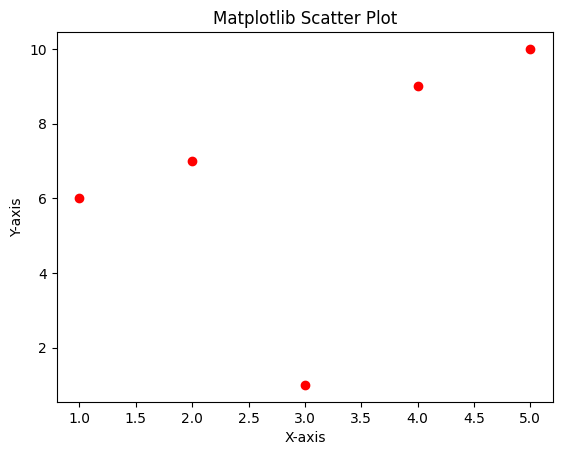

In [42]:
"""
3. Create a scatter plot using Matplotlib.
"""

import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [6, 7, 1, 9, 10] #data size must be of same for x and y

plt.scatter(x, y, color='red')
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Matplotlib Scatter Plot")
plt.show()

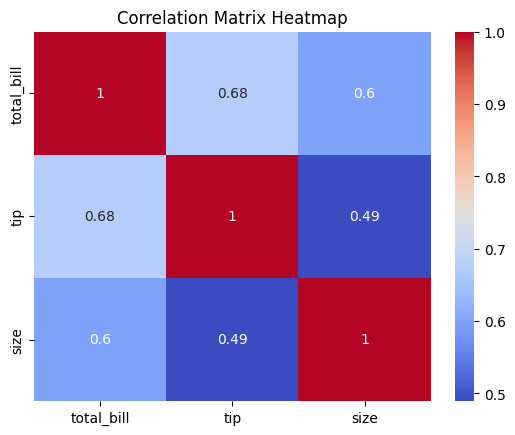

In [67]:
"""
4. How do you calculate the correlation matrix using Seaborn and visualize it with a heatmap.
"""

import matplotlib.pyplot as plt #for plotting.
import seaborn as sns #for data visualization and loading datasets.
import pandas as pd #for DataFrame operations.

df = sns.get_dataset_names() # to get the data set names

df = sns.load_dataset("tips") #load tips data set

correlation_matrix = df.corr(numeric_only=True) #make correlation matrix with only numerical data like total_bill, tip and size (correlation = linear relationship between two numerical variables., +1 = postive relation, -1 = negative relation and 0 means = no relation)

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm") #create heatmap using seaborn and enable correlation value in each cell with color.

plt.title("Correlation Matrix Heatmap")
plt.show()

In [73]:
"""
5. Generate a bar plot using Plotly.
"""

import plotly.express as px #for interactive data visualization
import pandas as pd #for DataFrame operations.


data = {'Name' : ['Alice', 'Bob', 'John'], 'Age' : [25, 30, 35], 'Score': [85, 90, 95]}

df = pd.DataFrame(data)
df

fig = px.bar(df, x = 'Name', y = 'Age', title = 'Bar Plot', color_discrete_sequence=['red'])
fig.show()


In [112]:
"""
6. Create a DataFrame and add a new column based on an existing column.
"""

import pandas as pd
import seaborn as sns

df = sns.load_dataset("tips")
df

df["Final_Received_Amount"] = df.total_bill + df.tip

print(df)

     total_bill   tip     sex smoker   day    time  size  \
0         16.99  1.01  Female     No   Sun  Dinner     2   
1         10.34  1.66    Male     No   Sun  Dinner     3   
2         21.01  3.50    Male     No   Sun  Dinner     3   
3         23.68  3.31    Male     No   Sun  Dinner     2   
4         24.59  3.61  Female     No   Sun  Dinner     4   
..          ...   ...     ...    ...   ...     ...   ...   
239       29.03  5.92    Male     No   Sat  Dinner     3   
240       27.18  2.00  Female    Yes   Sat  Dinner     2   
241       22.67  2.00    Male    Yes   Sat  Dinner     2   
242       17.82  1.75    Male     No   Sat  Dinner     2   
243       18.78  3.00  Female     No  Thur  Dinner     2   

     Final_Received_Amount  
0                    18.00  
1                    12.00  
2                    24.51  
3                    26.99  
4                    28.20  
..                     ...  
239                  34.95  
240                  29.18  
241               

In [81]:
"""
7. Write a program to perform element-wise multiplication of two NumPy arrays.
"""
import numpy as np

array1 = np.arange(5) #[0,1, 2, 3, 4]
array2 = np.arange(5) #[0,1, 2, 3, 4]

mult_array = array1 * array2
print(f"Multiply array :", mult_array)

Multiply array : [ 0  1  4  9 16]


<ipython-input-87-451e7027f263>:12: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



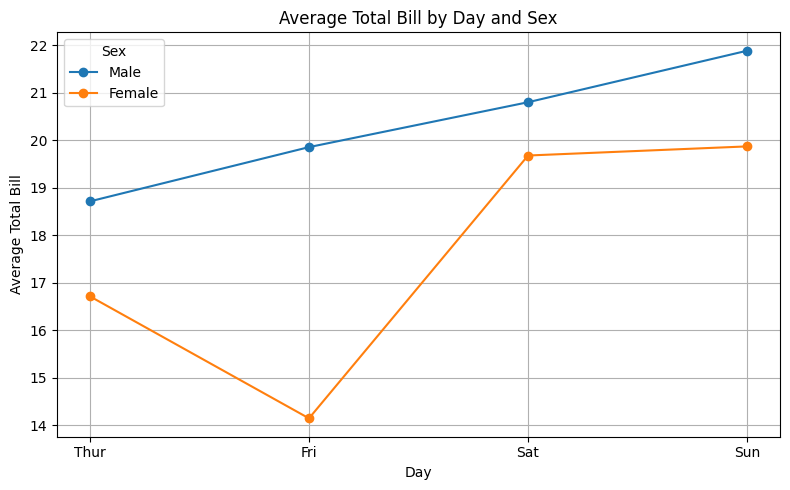

In [87]:
"""
8. Create a line plot with multiple lines using Matplotlib.
"""

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = sns.load_dataset("tips")
# df

grouped = df.groupby(["day", "sex"])["total_bill"].mean().unstack() #Group and average total_bill by day and sex(categorical data), unstack to reshape the data frame for proper visualization
# grouped

plt.figure(figsize=(8,5)) #create a new page with page size 8 width and 5 height

for sex in grouped.columns:
    plt.plot(grouped.index, grouped[sex], marker='o', label=sex)

plt.title("Average Total Bill by Day and Sex")
plt.xlabel("Day")
plt.ylabel("Average Total Bill")
plt.legend(title="Sex") #Legend for Male/Female lines
plt.grid(True) #Grid for readability
plt.tight_layout() #fixes spacing
plt.show() #renders the final plot


In [102]:
"""
9. Generate a Pandas DataFrame and filter rows where a column value is greater than a threshold.
"""

import pandas as pd
import seaborn as sns

df = sns.load_dataset("tips")
new_df = df[df.total_bill > 45]
# new_df
print(new_df.head())  # print first few rows


     total_bill    tip   sex smoker  day    time  size
59        48.27   6.73  Male     No  Sat  Dinner     4
156       48.17   5.00  Male     No  Sun  Dinner     6
170       50.81  10.00  Male    Yes  Sat  Dinner     3
182       45.35   3.50  Male    Yes  Sun  Dinner     3
212       48.33   9.00  Male     No  Sat  Dinner     4


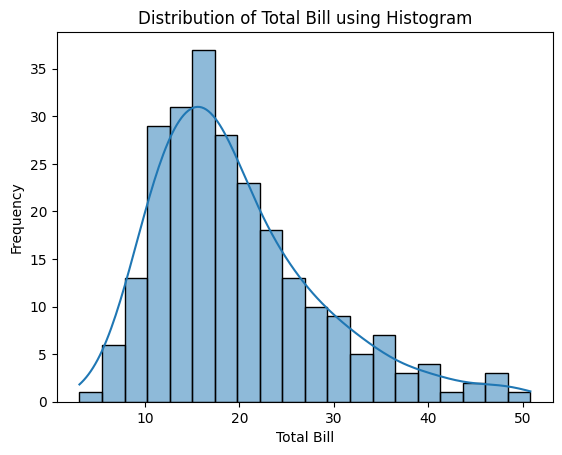

In [106]:
"""
10. Create a histogram using Seaborn to visualize a distribution.
"""

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = sns.load_dataset("tips")
df

sns.histplot(data = df, x = "total_bill",bins =20, kde= True ) #bins = default is 10, controls the number of bars in the histogram., kde = overlays a smoothed density curve
plt.title("Distribution of Total Bill using Histogram")
plt.xlabel("Total Bill")
plt.ylabel("Frequency")
plt.show()

In [109]:
"""
11.  Perform matrix multiplication using NumPy.
"""

import numpy as np

# Create two 2D matrices of compatible shapes
array1 = np.arange(6).reshape(2, 3)  # Shape: (2 rows, 3 columns)
array2 = np.arange(6).reshape(3, 2)  # Shape: (3 rows, 2 columns)

# Matrix multiplication
result = np.matmul(array1, array2)

print("Array 1:\n", array1)
print("Array 2:\n", array2)
print("Result of matrix multiplication:\n", result)


Array 1:
 [[0 1 2]
 [3 4 5]]
Array 2:
 [[0 1]
 [2 3]
 [4 5]]
Result of matrix multiplication:
 [[10 13]
 [28 40]]


In [111]:
"""
12. Use Pandas to load a CSV file and display its first 5 rows.
"""

import pandas as pd

url= "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv"

df = pd.read_csv(url)
print(df.head()) #head displays first 5 rows

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [113]:
"""
13. Create a 3D scatter plot using Plotly.
"""
import plotly.express as px
import pandas as pd
import seaborn as sns

df = sns.load_dataset("tips")

fig = px.scatter_3d(df,
                    x='total_bill',
                    y='tip',
                    z='size',
                    color='sex',  # Optional: adds color by category
                    title="3D Scatter Plot of Tips Data")

fig.show()
